In [11]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
%run DataLoader.ipynb
%run ImageProcessor.ipynb
%run DataExplorer.ipynb
%run DatasetStatistics.ipynb
%run DuplicateDetector.ipynb

In [13]:
DATA_ROOT = "./data"
TRAIN_DIR = "./data/Training"
TEST_DIR = "./data/Testing"
BATCH_SIZE = 64
IMAGE_SIZE = (224, 224)

In [14]:
device = (
    torch.accelerator.current_accelerator().type
    if torch.accelerator.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [15]:
loader = DataLoader(TRAIN_DIR, TEST_DIR)
all_files = loader.load_all_images()

print(f"Successfully loaded {len(all_files)} images")

Successfully loaded 3264 images



Checking 3264 files for duplicates...


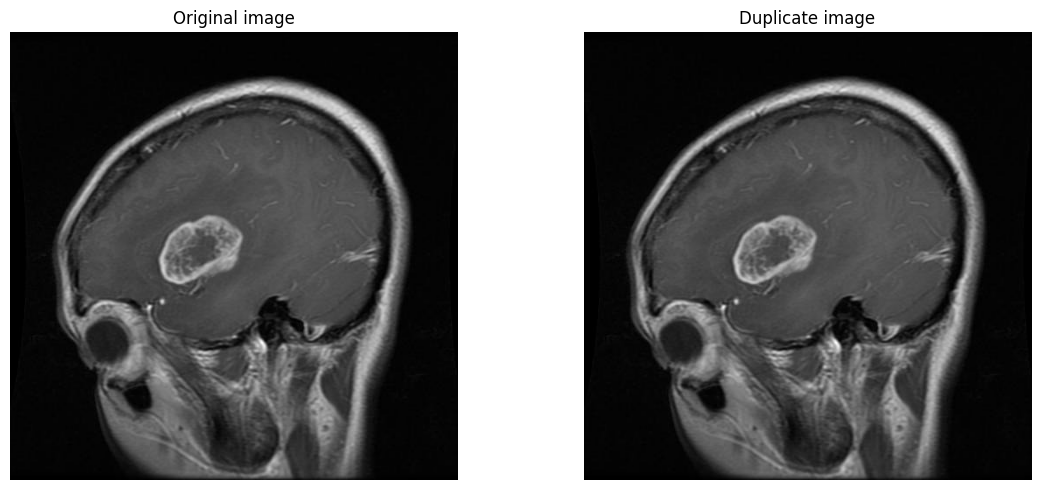

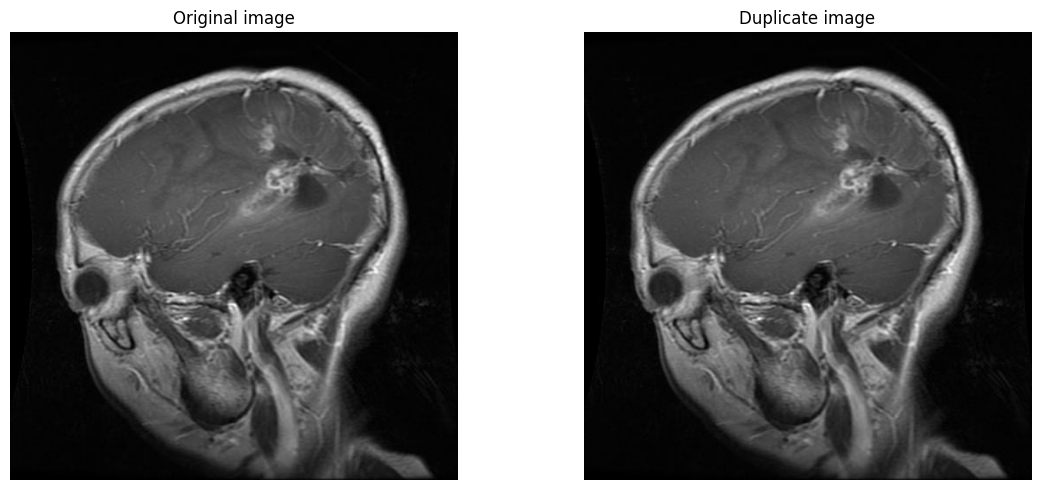

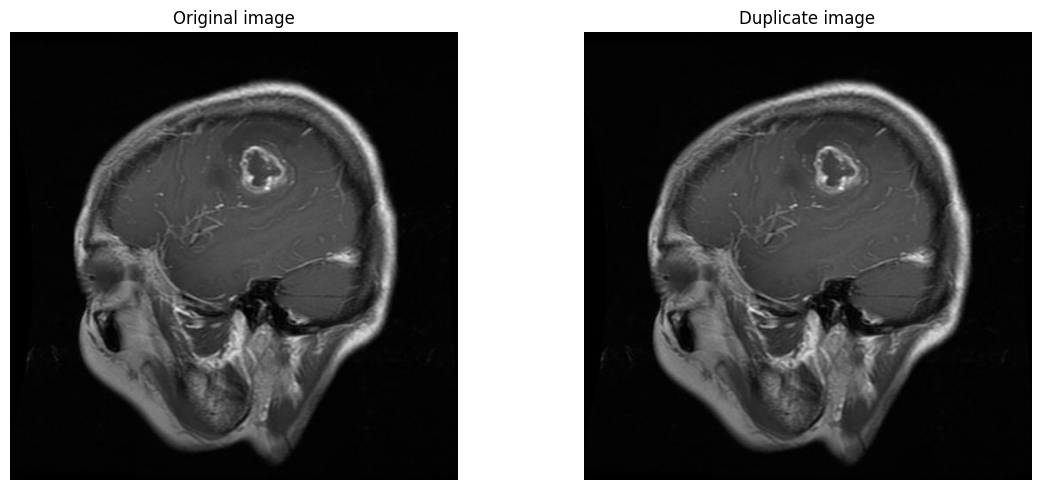

Checked 100 out of 3264 files


KeyboardInterrupt: 

In [9]:
duplicate_detector = DuplicateDetector(all_files)
duplicate_detector.detect_duplicates()

if len(duplicate_detector.duplicates) > 0:  # If duplicate files are present
    duplicate_detector.remove_duplicates_from_disk()  # Removing duplicates entirely from disk to make every next call faster
    all_files = duplicate_detector.get_unique_files()  # Cleaning list with file paths

In [22]:
loader.print_dataset_class_count()

Training folder details:
	glioma_tumor: 826 images
	meningioma_tumor: 822 images
	no_tumor: 395 images
	pituitary_tumor: 827 images
Testing folder details:
	glioma_tumor: 100 images
	meningioma_tumor: 115 images
	no_tumor: 105 images
	pituitary_tumor: 74 images



In [23]:
processor = ImageProcessor(all_files)

In [ ]:
explorator = DataExplorer(all_files)
explorator.retrieve_sample_of_images(
    [0, len(all_files) // 2, -1]
)  # First, middle and last image

explorator.plot_histogram()

TypeError: unsupported operand type(s) for //: 'list' and 'int'

In [ ]:
train_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize(image_size)]
)

testval_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize(image_size)]
)

In [ ]:
trainset = datasets.ImageFolder(training_path, transform=train_transform)
testset = datasets.ImageFolder(testing_path, transform=testval_transform)

split_ratio = 0.15
trainset_len = len(trainset)
valset_len = int(split_ratio * trainset_len)

trainset, validationset = torch.utils.data.random_split(
    trainset,
    [trainset_len - valset_len, valset_len],
    generator=torch.Generator().manual_seed(42),
)

In [ ]:
train_dl = DataLoader(trainset, batch_size, shuffle=True, num_workers=3)
test_dl = DataLoader(testset, batch_size, shuffle=True, num_workers=3)
validation_dl = DataLoader(validationset, batch_size, shuffle=True, num_workers=3)

In [ ]:
examples = iter(train_dl)
imgs, labels = next(examples)
# access labels
# class_names = trainset.dataset.classes